
***Domain:***
Banking
    
    
***Context:***
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.    
    
    
***Objective:***
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

In [ ]:
import pand

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Information on the features or attributes

The attributes can be divided accordingly :


The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Customer's age in completed years
* Experience - #years of professional experience
* Income - Annual income of the customer 
* CCAvg - Avg. spending on credit cards per month 
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

The nominal variable is :

* ID : Customer ID
* ZIP Code : Home Address ZIP code.


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">2. Study the data distribution in each attribute, share your findings

In [6]:
df.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [7]:
df[df['Experience'] < 0].count()


ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [8]:
#There are some negative values in the Experience. This could be a data input error as it is not possible to measure negative 
#years of experience. So, I am replacing negative values with absolute value.

df['Experience'] = df['Experience'].abs()

In [9]:
df[df['Experience'] < 0].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
df.describe().transpose()


count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;"> Univariate Analysis and Bivariate Analysis

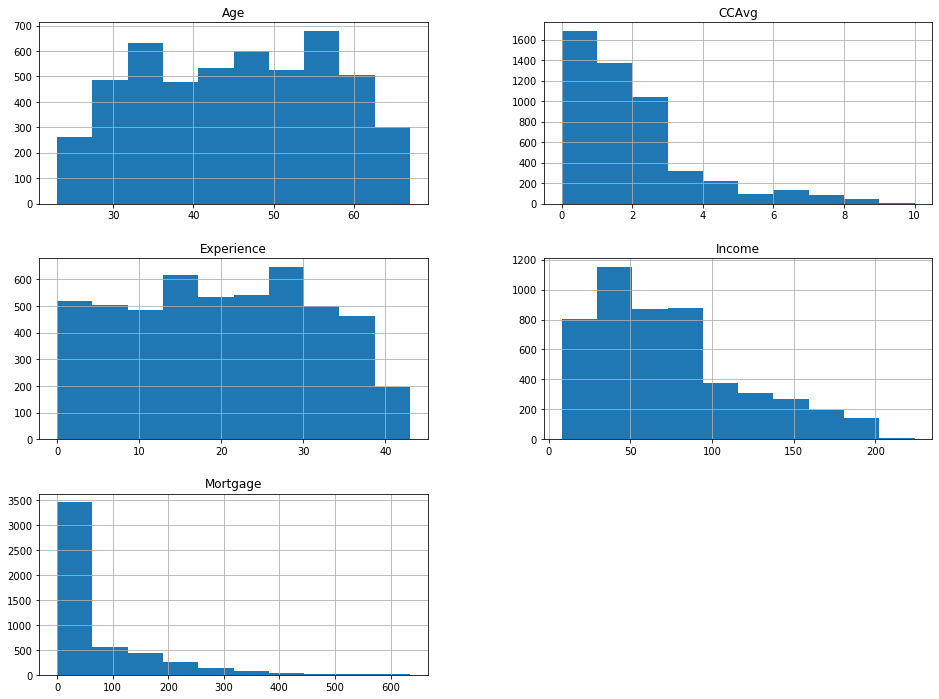

In [11]:
df.hist(figsize=(16, 12),column=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])

plt.show()

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
* CCAvg is a right skewed variable and average spending is between 0K to 10K and majority spends less than 3K.
* Experience is normally distributed.
* Income feature is right skewed distribution and also mean is greater than median.
* Mortgage is right skewed with majority of customers have no mortgage.


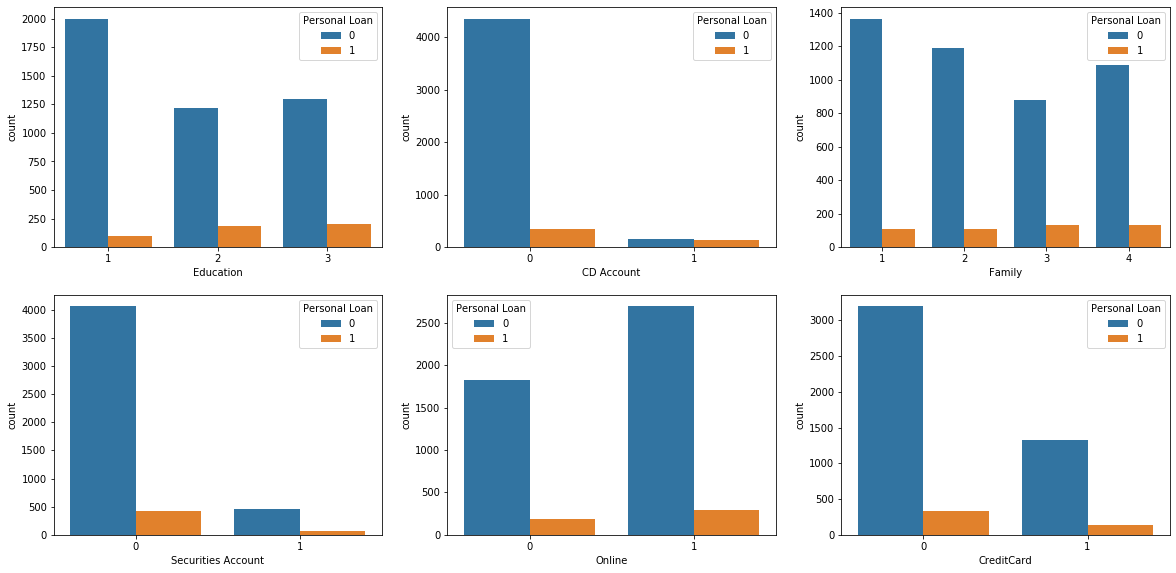

In [12]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.countplot(x = 'Education', hue ='Personal Loan', data = df)
plt.xlabel('Education')

plt.subplot(3,3,2)
sns.countplot(x='CD Account',data=df,hue='Personal Loan')
plt.xlabel('CD Account')

plt.subplot(3,3,3)
sns.countplot(x='Family',data=df,hue='Personal Loan')
plt.xlabel('Family')

plt.subplot(3,3,4)
sns.countplot(x = 'Securities Account', hue ='Personal Loan', data = df)

plt.subplot(3,3,5)
sns.countplot(x = 'Online', hue ='Personal Loan', data = df)

plt.subplot(3,3,6)
sns.countplot(x = 'CreditCard', hue ='Personal Loan', data = df)

plt.show()




* Customers with Personal Loan has higher Proportion for Education with 2 and 3 than 1.
* Customers with No CD Account are more than who have one. Also, Almost All Customers with CD Account took Personal Loan.
* Family size of the customers with Personal Loan are more for customers with 3 and 4 Family members.
* Customers with No Securities Account are more than who have one.
* Customers are using more Interent Banking Facilities.
* Customers using a credit card issued by UniversalBank are less.

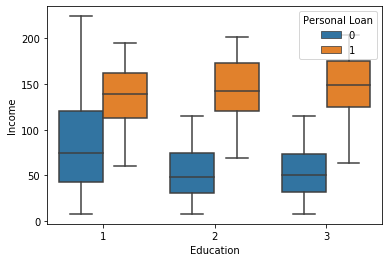

In [13]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

<font color=darkblue size=4>Proportion of customers who applied for Personal Loan are almost same with all education level.


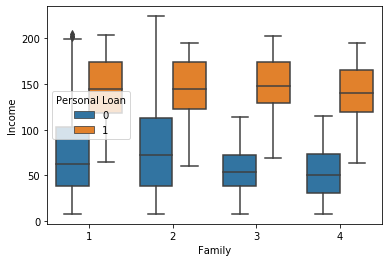

In [14]:
sns.boxplot(data=df, x='Family', y='Income', hue='Personal Loan')

<font color=darkblue size=4>Proportion of customers who applied for Personal Loan are almost same with number of Family members


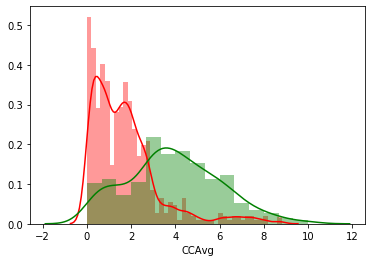

In [15]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')

<font color=darkblue size=4>Customers who have personal loan have a higher credit card average

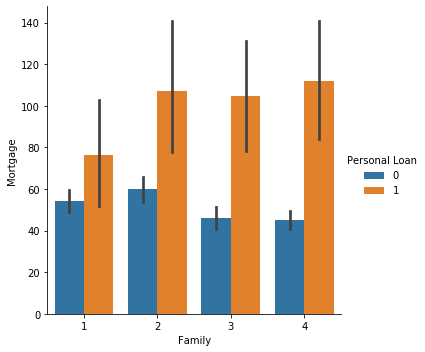

In [16]:
sns.catplot(x="Family", y="Mortgage", hue="Personal Loan", kind="bar", data=df)

<font color=darkblue size=4>Customers with High Mortgage took Personal Loan.

In [17]:
# Checking number of unique values for categorical columns
categorical_vars = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
print(df[categorical_vars].nunique())
numerical_vars = [col for col in df.columns if col not in categorical_vars]
print("Numerical Variables are" ,numerical_vars)
print("Categorical Variables are" ,categorical_vars)

Family                4
Education             3
Personal Loan         2
Securities Account    2
CD Account            2
Online                2
CreditCard            2
dtype: int64
Numerical Variables are ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']
Categorical Variables are ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">MultiVariate Analysis

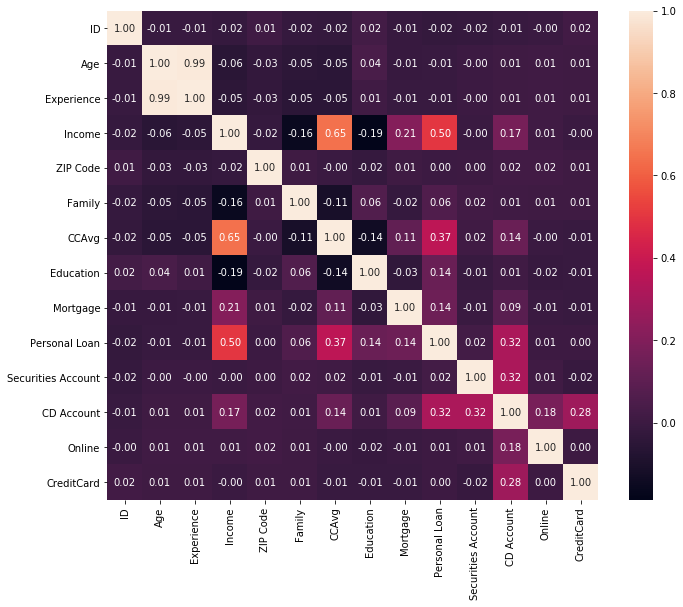

In [18]:
    plt.figure(figsize = (11, 9))
    sns.heatmap(df.corr(), annot=True, fmt='.2f')


In [19]:
    df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
    df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

The feature ID and ZIP Code does not add any interesting information. There is no association between a person's customer ID ,ZIPCODE with the target column and thus removing from the model.

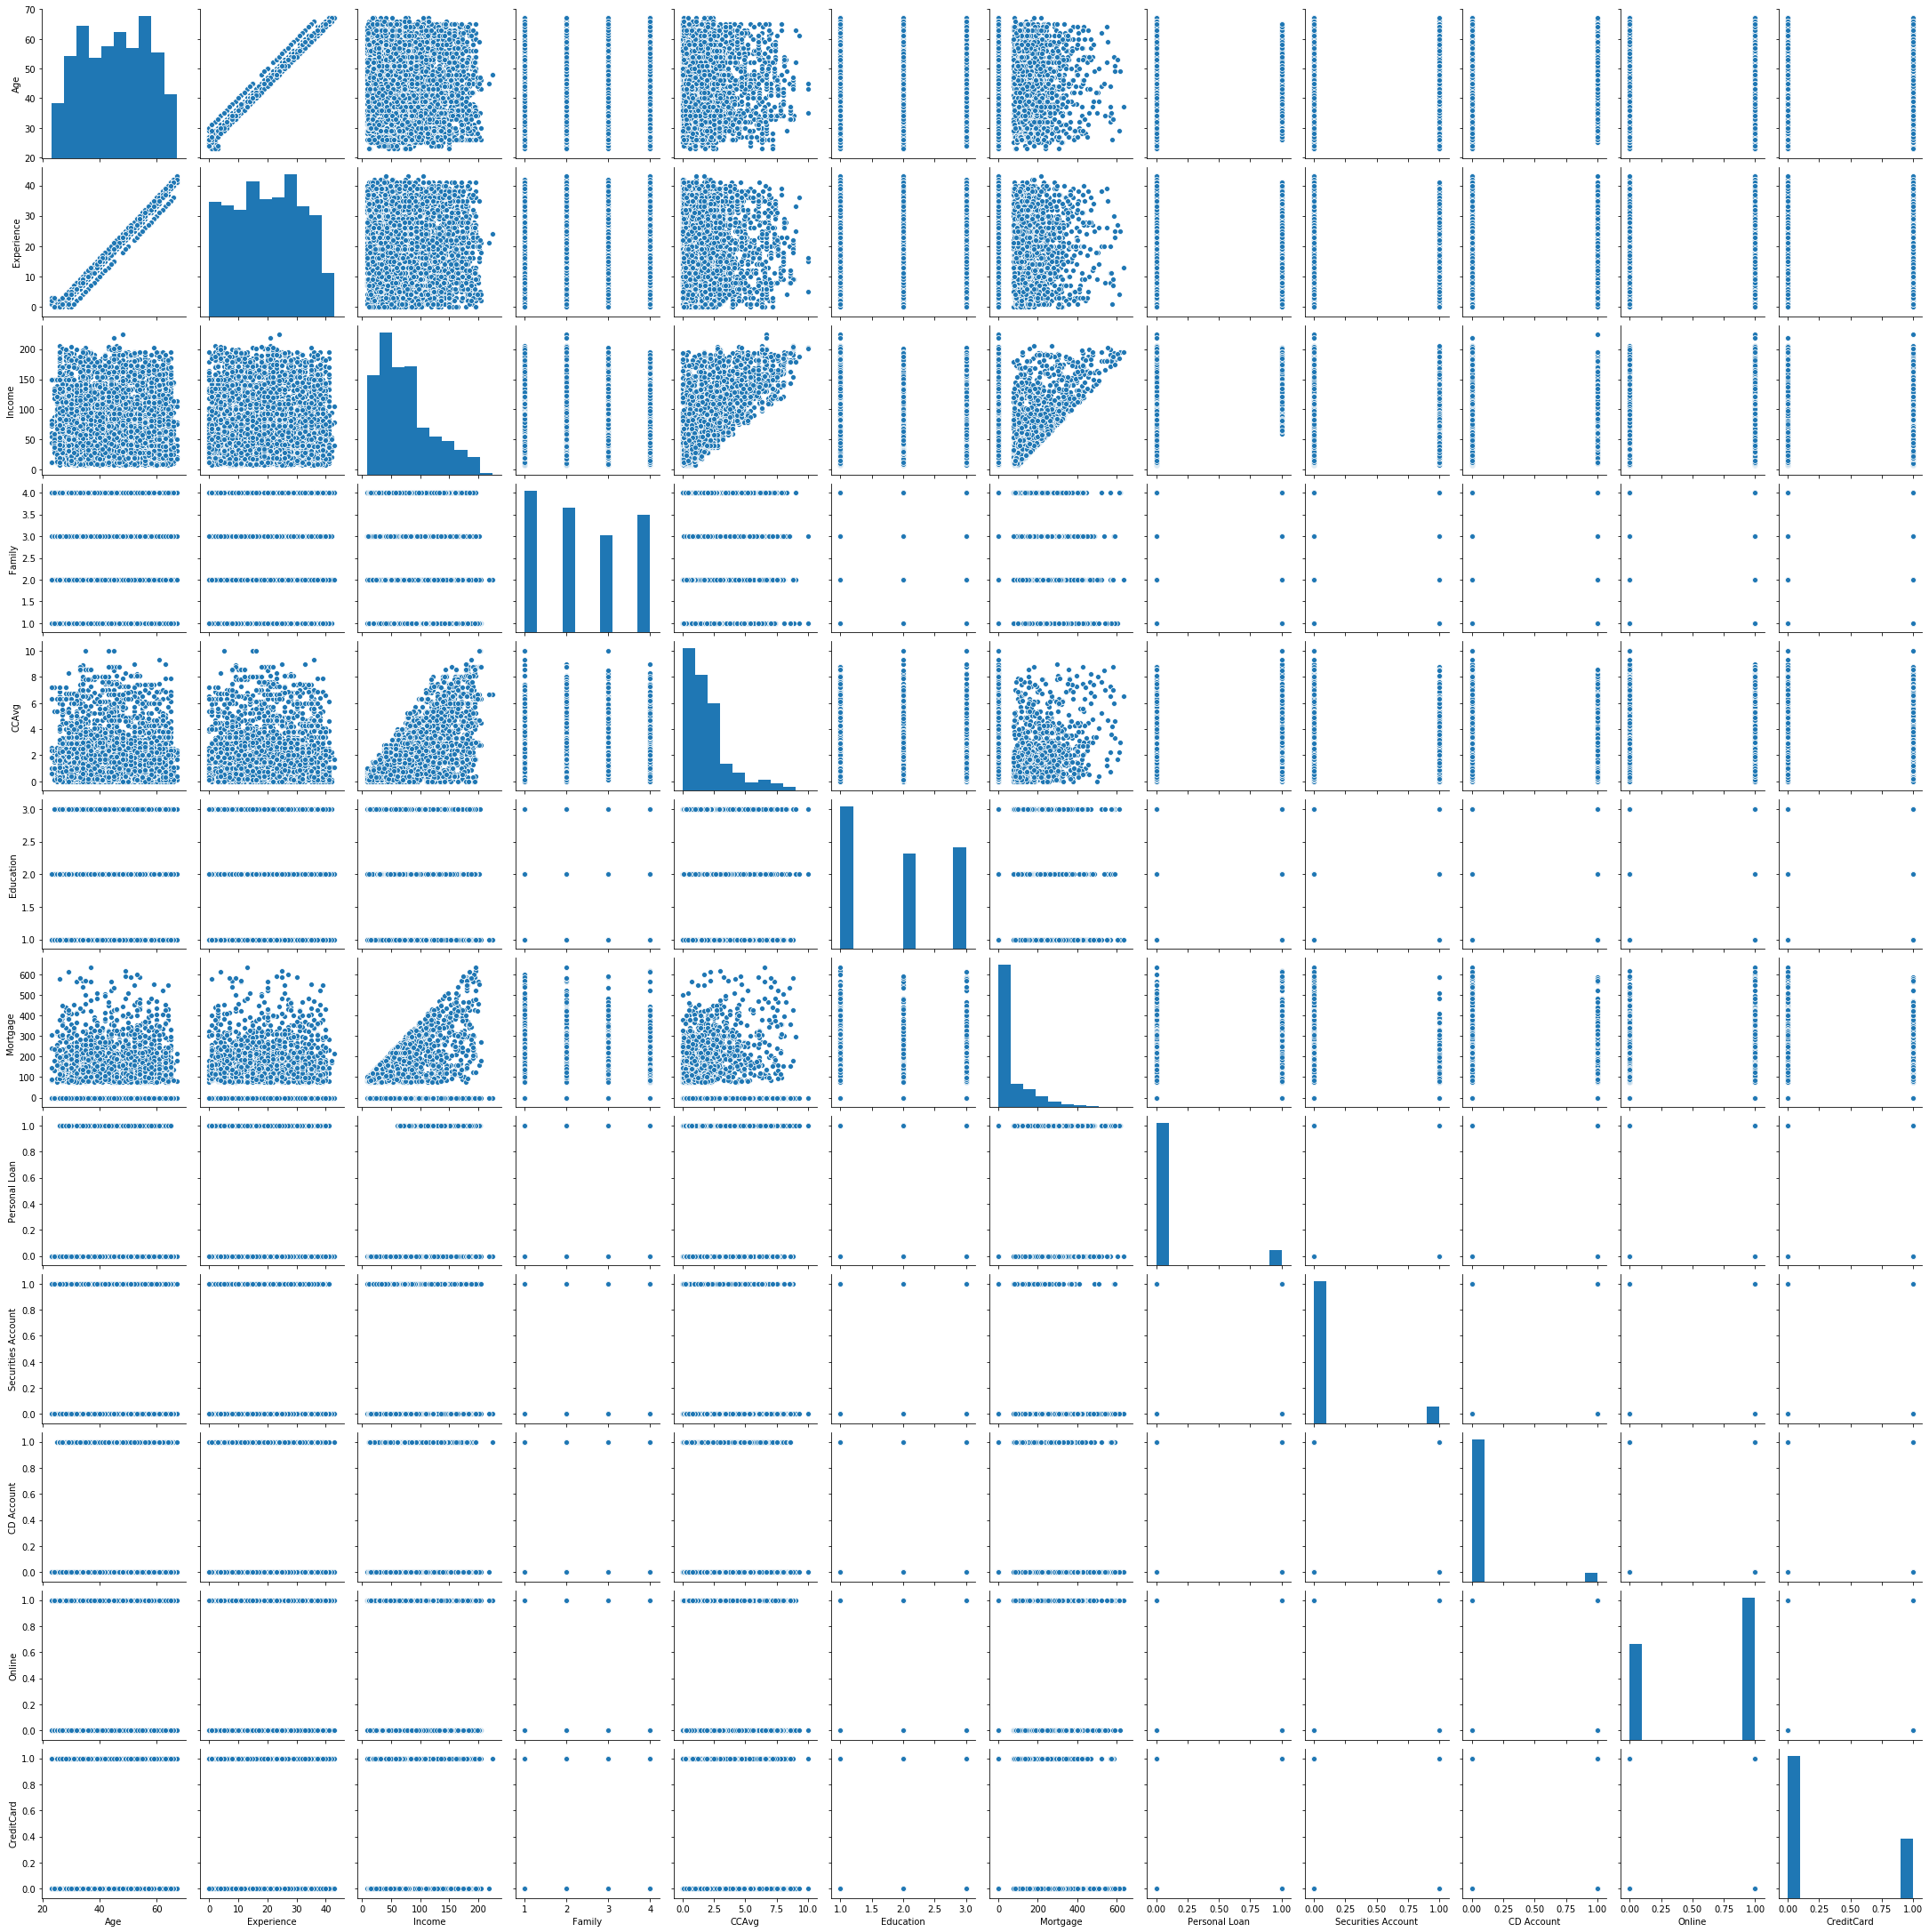

In [20]:
sns.pairplot(df)

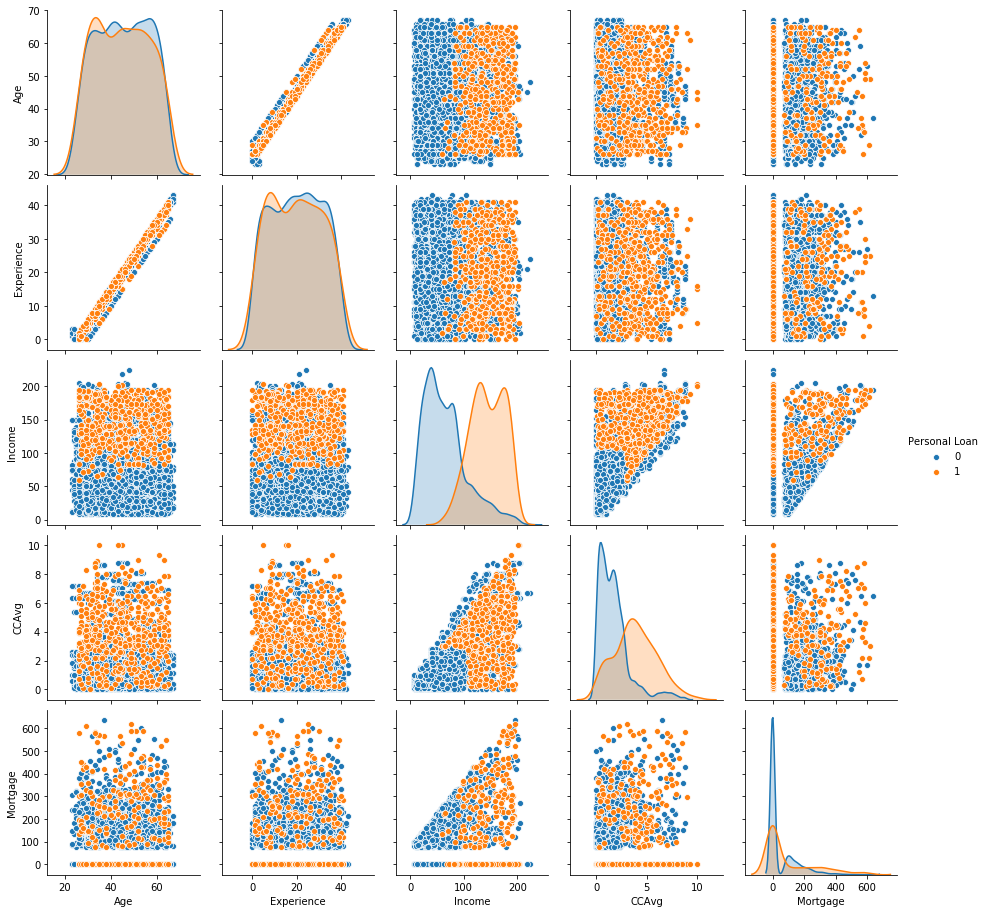

In [21]:
sns.pairplot(df, vars=['Age','Experience', 'Income', 'CCAvg', 'Mortgage'],hue='Personal Loan')

* **Age** has a very strong association with **Experience**. 
* **Income** and **CCAvg** is also correlated.
* Income column, CC Avg, CD Account provides a good correlation with the target column.


In [4]:
sns.countplot(df['Personal Loan'])
print(df['Personal Loan'].value_counts(normalize = True)*100)

NameError: name 'sns' is not defined

 "Personal Loan" is the target column. This column tells whether the person is opting for the Personal loan or not.
The data set is skewed in terms of target column.There are far few records in class 1 i.e. people who took the personal loan last time. We have to identify potential customers and do not want any potential customer to be missed. .Roughly 10% of customers have accepted the Personal Loan offered during earlier campaign.

In [23]:
# dropping few columns due to poor coorelation with Target column
df.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
df.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [24]:
# Separating dependent and independent variables
X = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan']

display(X.describe().T, X.shape, y.shape)

count       mean         std  min   25%   50%    75%  \
Experience          5000.0  20.134600   11.415189  0.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729  8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663  1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659  0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869  1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802  0.0   0.0   0.0  101.0   
Securities Account  5000.0   0.104400    0.305809  0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250  0.0   0.0   0.0    0.0   

                      max  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Securities Account    1.0  
CD Account            1.0

(5000, 8)

(5000,)

In [25]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 8) (1500, 8) (3500,) (1500,)


C:\Users\gurup\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression model 


LR accuracy for train set: 0.95
LR accuracy for test set: 0.95

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.55      0.67       149

    accuracy                           0.95      1500
   macro avg       0.90      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500


Confusion Matrix:
 [[1336   15]
 [  67   82]]

Accuracy Score:
 0.95


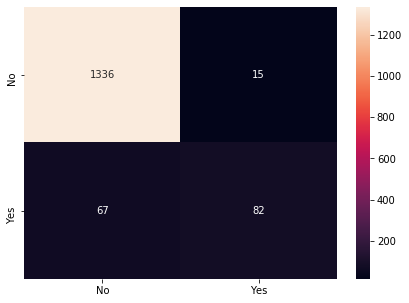

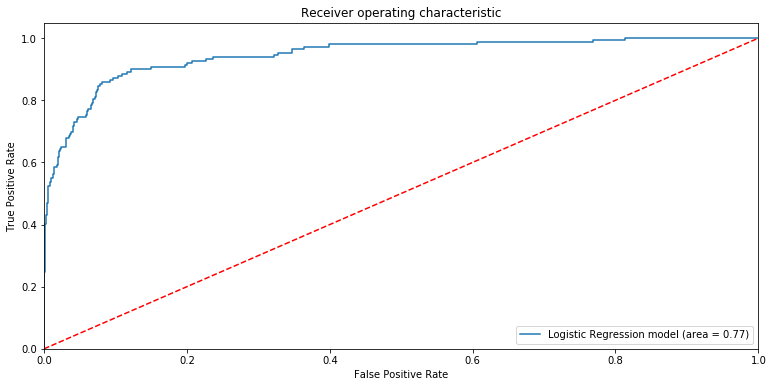

In [26]:
    # Logistic Regression model 
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

print('Logistic Regression model \n\n')
print('LR accuracy for train set: {0:.2f}'.format(logreg.score(X_train, y_train)))
print('LR accuracy for test set: {0:.2f}'.format(logreg.score(X_test, y_test)))

y_true, y_pred = y_test, logreg.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression model (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [27]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3500, 8) (1500, 8) (3500,) (1500,)


k-Nearest Neighbor Classifier without Hyperparameter Tuning


k-NN accuracy for train set: 0.94
k-NN accuracy for test set: 0.91

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1351
           1       0.54      0.39      0.45       149

    accuracy                           0.91      1500
   macro avg       0.74      0.68      0.70      1500
weighted avg       0.90      0.91      0.90      1500


Confusion Matrix:
 [[1302   49]
 [  91   58]]

Accuracy Score:
 0.91


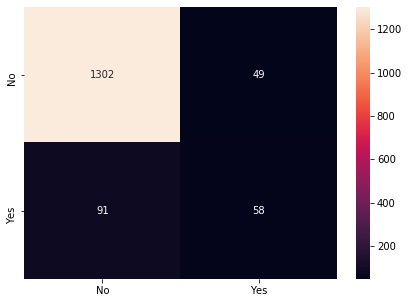

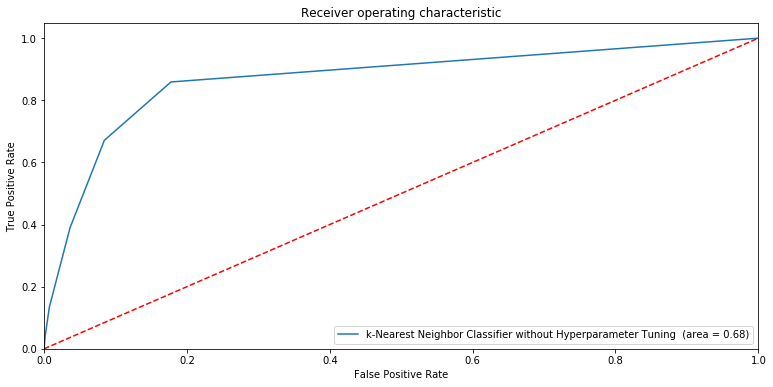

In [28]:
# k-Nearest Neighbor Classifier without Hyperparameter Tuning
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {0:.2f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.2f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-Nearest Neighbor Classifier without Hyperparameter Tuning  (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

(3500, 8)

(1500, 8)

(3500,)

(1500,)

KNN with hyperparameter tuning


Best Hyper Parameters are:  {'n_neighbors': 3, 'weights': 'distance'}

Best Score is:  0.97
k-NN accuracy for train set: 1.00
k-NN accuracy for test set: 0.97

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.93      0.70      0.80       149

    accuracy                           0.97      1500
   macro avg       0.95      0.85      0.89      1500
weighted avg       0.96      0.97      0.96      1500


Confusion Matrix:
 [[1343    8]
 [  44  105]]

Accuracy Score:
 0.97


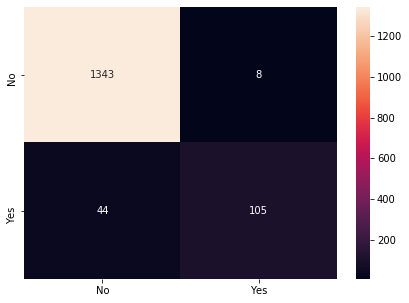

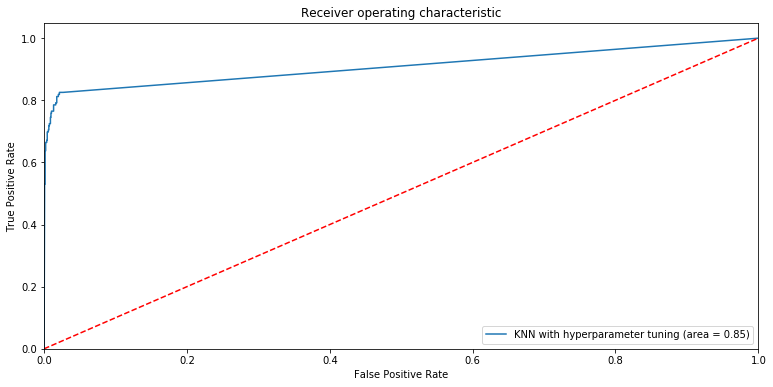

In [29]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN with hyperparameter tuning
KNN = KNeighborsClassifier()

params = {'n_neighbors': list(range(1, 30, 2)), 'weights': ['uniform', 'distance']}

cv = StratifiedKFold(n_splits = 10)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = cv)

KNN_hyper.fit(X_train, y_train)

print('KNN with hyperparameter tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(2))

print('k-NN accuracy for train set: {0:.2f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.2f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'KNN with hyperparameter tuning (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

(3500, 8)

(1500, 8)

(3500,)

(1500,)

Naive Bayes 


NB accuracy for train set: 0.89
NB accuracy for test set: 0.87

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Confusion Matrix:
 [[1228  123]
 [  65   84]]

Accuracy Score:
 0.87


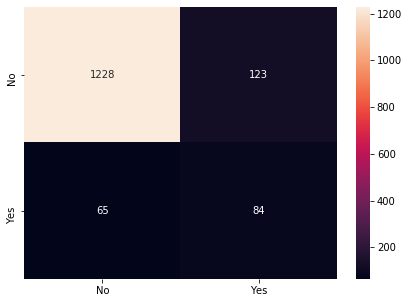

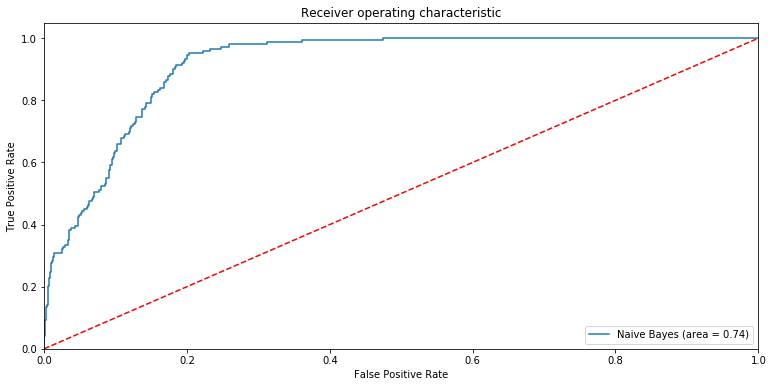

In [30]:
# Naive Bayes Model
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes \n\n')
print('NB accuracy for train set: {0:.2f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.2f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

(3500, 8)

(1500, 8)

(3500,)

(1500,)

Fitting 5 folds for each of 41 candidates, totalling 205 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:   58.1s finished


Support Vector Classifier Scores


SVC accuracy for train set: 0.97
SVC accuracy for test set: 0.90
Best Hyper Parameters are:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Best Score is:  0.89

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1362
           1       0.92      0.87      0.90       138

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500


Confusion Matrix:
 [[1352   10]
 [  18  120]]

Accuracy Score:
 0.98


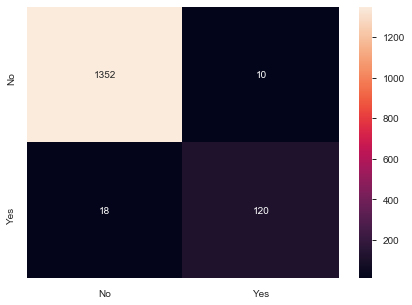

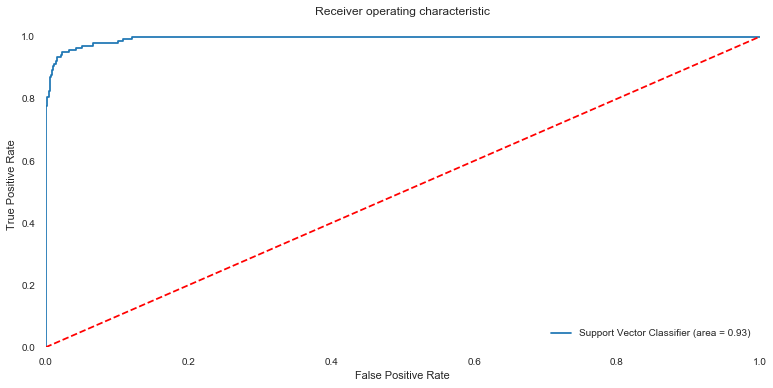

In [38]:
#### Just for My Testing(Please ignore)

# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cv = StratifiedKFold(n_splits = 5)
params = [
            {'C': ["auto",0.1, 1, 10, 100, 1000], "kernel" : ["rbf"], 
              'gamma': ["auto",1, 0.1, 0.01, 0.001, 0.0001]}, 
            {'C': [0.1, 1, 10, 100, 1000], "kernel" : ["linear"]}
        ]
clf = GridSearchCV(estimator = SVC(probability=True), param_grid = params, 
                   cv = cv, n_jobs = -1, scoring = "f1", verbose = 2)
clf.fit(X_train, y_train)

print('Support Vector Classifier Scores\n\n')
print('SVC accuracy for train set: {0:.2f}'.format(clf.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.2f}'.format(clf.score(X_test, y_test)))

print('Best Hyper Parameters are: ', clf.best_params_)
print('\nBest Score is: ', clf.best_score_.round(2))

y_true, y_pred = y_test, clf.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(2))

# ROC Curve
roc_auc = roc_auc_score(y_true, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, clf.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Support Vector Classifier (area = {})'.\
         format(roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">Give your reasoning on which is the best model in this case and why it performs
better?

* **Accuracy** : Model can predict at X% accurary the total number of customers opting+not-opting for personal-loan vs total number of customers. Since the target distribution is skewed and imbalanced, Accuracy wont be good metric.

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. 

* **Recall** : Model can predict at X% the number of customers opting for personal-loan among the total number of customers who will actually opt for personal-loan
* **Precision** : Model can predict at X%, among all the predicted customers opting for personal-loan, how many actually opted for personal loan.



| Models      | Accuracy  (%) | Precision  (%) |  Recall (%) | F1-score (%) | ROC AUC (%) |
|-------------|--------------------------|----------------------|-----|----|-----|
| **Logistic Regression** | 95 | 85 | 55 | 67 | 77|
| **k-Nearest Neighbor without Hyperparameter Tuning** | 91 | 54 | 39 | 45 | 68
| ***k-Nearest Neighbor with Hyperparameter Tuning*** | ***97*** | ***93***| ***70*** | ***80***|***85***
| **Naive Bayes** | 87| 41| 56| 47| 74


<font color=darkblue size=4>The objective of this Project is to predict the likelihood of a liability customer buying personal loans.
So, I am going with model that gives me good recall and Hence KNN with Hyperparameter tuning wins the contest.

In [34]:
#Getting the pandas profiling report 
import pandas_profiling 
pandas_profiling.ProfileReport(df)

In [35]:
#Getting an html file as output here 
pandas_profiling.ProfileReport(df).to_file('TheraBank.html')